# Outliers And Impact On Machine Learning!!¶

Which Machine Learning Models Are Sensitive To Outliers?

1.  Naivye Bayes Classifier--- Not Sensitive To Outliers
2.  SVM-------- Not Sensitive To Outliers
3.  Linear Regression---------- Sensitive To Outliers
4.  Logistic Regression------- Sensitive To Outliers
5.  Decision Tree Regressor or Classifier---- Not Sensitive
6.  Ensemble(RF,XGboost,GB)------- Not Sensitive
7.  KNN--------------------------- Not Sensitive
8.  Kmeans------------------------ Sensitive
9.  Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

# Outlier

It is completely different data point (significantly different from other points) which deviates somuch from other observations. Which can arrise some suspiciion is called Outlier

Basically harmful to have ouliers in dataset.

Should outliers need to be removed?????

Depending on context, depending on problem statement either an outlier deservs some special attention. Some of se cases can be ignored.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Titanicdataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12'],
      dtype='object')

In [6]:
df = df.drop('Unnamed: 12', axis =1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
import seaborn as sns

D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda\envs\pytorchenv\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
D:\Anaconda\envs\pytorchenv\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


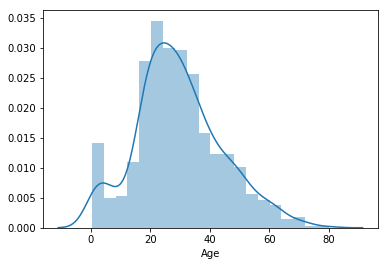

In [10]:
sns.distplot(df['Age'], bins=20)

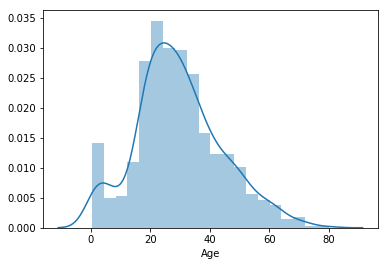

In [11]:
sns.distplot(df['Age'].dropna(), bins=20)

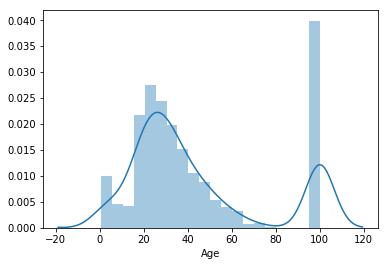

In [12]:
sns.distplot(df['Age'].fillna(100), bins=20)

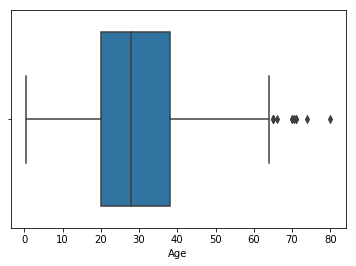

In [13]:
sns.boxplot(df['Age'])

# Gaussian Distributed

Text(0, 0.5, 'No of Passenger')

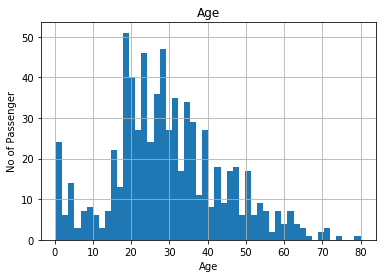

In [14]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

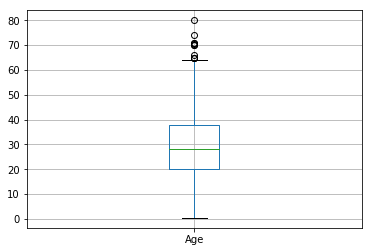

In [15]:
df.boxplot(column='Age')

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# If The Data Is Normally Distributed We use this

In [18]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = df['Age'].mean() + 3* df['Age'].std() # Here our mean of Age is midpoint of Gaussian curve and for that we are taking 3 standard to right side.
lower_boundary = df['Age'].mean() - 3* df['Age'].std() # Here our mean of Age is midpoint of Gaussian curve and for that we are taking 3 standard to left side.
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

If we had done guassian distribution you can stop upto here and from above output our upper limit is 73.27 and anything greater than 73.27 are outliers which we are going to leave. 

# If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passengers')

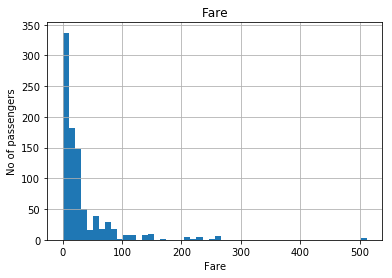

In [20]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

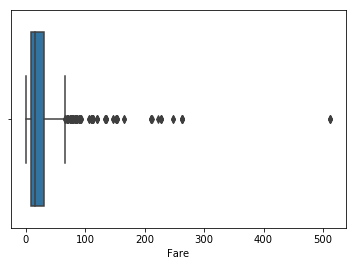

In [21]:
sns.boxplot(df['Fare'])

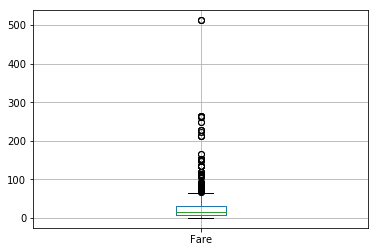

In [22]:
df.boxplot(column='Fare')

From the above figure as the Fare feature is right skewed we perform here IQR(Inter quantile Range) method for determining outliers. But not standard distribution.

In [23]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [27]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [29]:
##Extreme Outliers
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [30]:
data = df.copy()

In [33]:
data.loc[data['Age']>=73,'Age'] = 73 ## Wherever my data of Age is greater than 73 value that is considered as outlier and it is replaced with value 73

In [34]:
data.loc[data['Fare']>=100,'Fare'] = 100 ## Wherever my data of Age is greater than 100 value that is considered as outlier and it is replaced with value 100

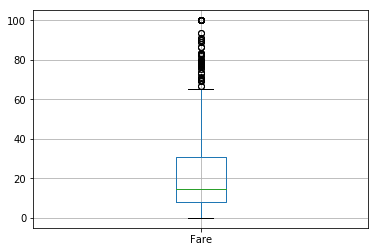

In [36]:
data.boxplot(column = 'Fare')

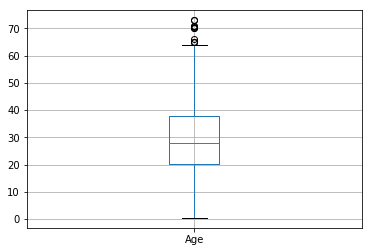

In [37]:
data.boxplot(column='Age')

Text(0, 0.5, 'No of Passenger')

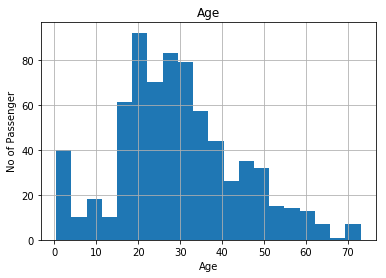

In [39]:
figure = data.Age.hist(bins=20)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

Text(0, 0.5, 'No of Passenger')

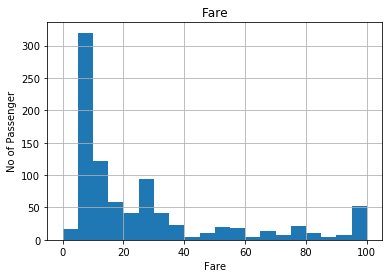

In [40]:
figure = data.Fare.hist(bins=20)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size = 0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
Y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score :{}'.format(accuracy_score(Y_test,Y_pred)))
print('Roc_auc_score :{}'.format(roc_auc_score(Y_test,Y_pred1[:,1])))

accuracy_score :0.6567164179104478
Roc_auc_score :0.6835358796296296


We can do different algorithms not only Logistic regression we can use random forest classifier also, Classification models can be applied.